In [1]:
import warnings
warnings.filterwarnings('ignore')

import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from keras.preprocessing.sequence import pad_sequences

import sys
sys.path.append('../')

from src.attention import SelfAttention
from src.models import FBRNN,RNN
torch.manual_seed(1)

DATA_DIR = '../Data/'

Using TensorFlow backend.


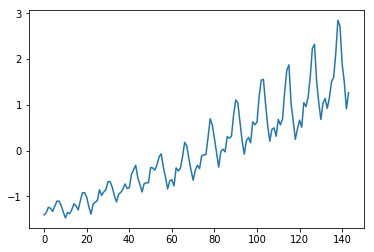

In [2]:
dataset = pd.read_csv(DATA_DIR+'international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = (dataset - dataset.mean()) / dataset.std() # RNN's are sensitive to non-standardized data
plt.plot(dataset)
plt.show()

In [3]:
batch_size = 1

sample_batch = torch.tensor(dataset.values)
sample_batch = sample_batch.view(144,1,1).type(torch.float32)

x = sample_batch[:-1]
y = sample_batch[1:]

100
200
300
400
500
600
700
800
900
1000


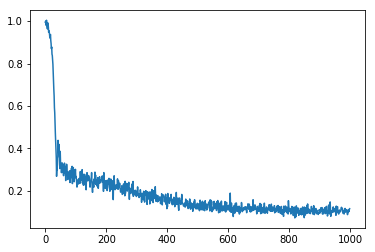

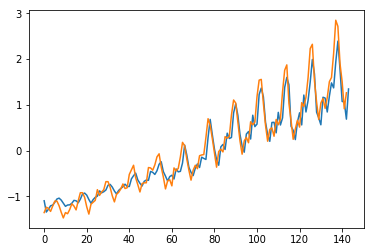

In [4]:
# testing basic RNN 
basic_model = RNN(hidden_size=16,num_layers=3,feature_size=1,batch_size=1)

opt = optim.SGD(basic_model.parameters(), lr = 0.01, momentum=0.9)
criterion = nn.MSELoss()

losses = []
basic_model.train()
for epoch in range(1000):
    if epoch % 100 == 100 - 1:
        print(epoch+1) # progress update
    #for batch in train_generator:
    basic_model.zero_grad()
    outputs = basic_model(sample_batch)
    last_outputs = torch.stack(outputs[:-1])
    loss = criterion(last_outputs.squeeze(), y.squeeze())
    
    loss.backward()
    opt.step()
    losses.append(loss.item())
    
plt.plot(losses)
plt.show()

basic_model.eval()
y_pred = torch.stack(basic_model(sample_batch.type(torch.float32))[:-1])
plt.plot(y_pred.detach().squeeze().numpy()) # detach is necessary because the output still has gradient tracking on it
plt.plot(y.squeeze().numpy())
plt.show()

100
200
300
400
500
600
700
800
900
1000


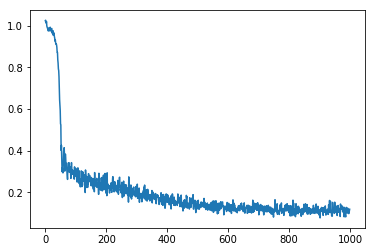

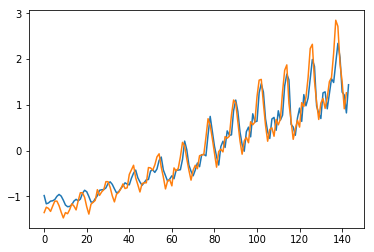

In [5]:
# testing custom RNN
custom_model = FBRNN(hidden_size=16, num_layers=3, batch_size=1, feature_size=1, attention_hidden_size=10)

opt = optim.SGD(custom_model.parameters(), lr = 0.01, momentum=0.9)
criterion = nn.MSELoss()

losses = []
custom_model.train()
for epoch in range(1000):
    if epoch % 100 == 100 - 1:
        print(epoch+1) # progress update
    #for batch in train_generator:
    custom_model.zero_grad()
    outputs = custom_model(sample_batch)
    last_outputs = torch.stack(outputs[:-1])
    loss = criterion(last_outputs.squeeze(), y.squeeze())
    
    loss.backward()
    opt.step()
    losses.append(loss.item())
    
plt.plot(losses)
plt.show()

custom_model.eval()
y_pred = torch.stack(custom_model(sample_batch.type(torch.float32))[:-1])
plt.plot(y_pred.detach().squeeze().numpy()) # detach is necessary because the output still has gradient tracking on it
plt.plot(y.squeeze().numpy())
plt.show()

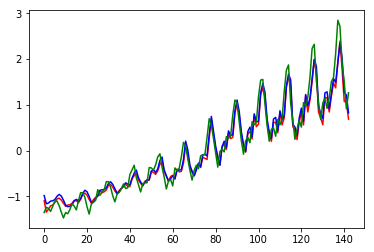

In [9]:
y_pred_basic = torch.stack(basic_model(sample_batch.type(torch.float32))[:-1])
plt.plot(y_pred_basic.detach().squeeze().numpy(), "red") # detach is necessary because the output still has gradient tracking on it
y_pred_custom = torch.stack(custom_model(sample_batch.type(torch.float32))[:-1])
plt.plot(y_pred_custom.detach().squeeze().numpy(), "blue") # detach is necessary because the output still has gradient tracking on it
plt.plot(y.squeeze().numpy(), "green")
plt.show()

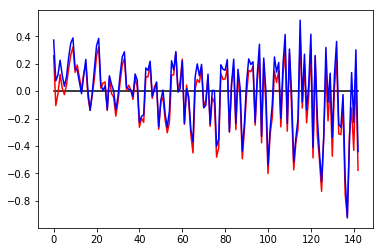

In [11]:
plt.plot(np.zeros(143), "black")
plt.plot(y_pred_basic.detach().squeeze().numpy() - y.squeeze().numpy(), "red")
plt.plot(y_pred_custom.detach().squeeze().numpy() - y.squeeze().numpy(), "blue")
plt.show()